In [ ]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import img_to_array, load_img, smart_resize, ImageDataGenerator
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from skimage import io

# For reproducibility
np.random.seed(42)

In [ ]:
train, test = image_dataset_from_directory(
    'cargo holds',
    image_size=(512, 512),
    batch_size=32,
    label_mode='binary',
    seed=42,
    validation_split=0.1,
    subset='both'
)

Found 120 files belonging to 2 classes.
Using 108 files for training.
Using 12 files for validation.


In [ ]:
# model for image classification
model = Sequential()
model.add(layers.Input((512, 512,3)))
model.add(layers.Rescaling(1./255))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
# compile model
model.compile(optimizer='adam', loss='bce', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 512, 512, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 510, 510, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 255, 255, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 253, 253, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 126, 126, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 124, 124, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 62, 62, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 60, 60, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      58,982,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,224,257 (225.92 MB)

 Trainable params: 59,224,257 (225.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# fit model
model.fit(train, epochs=10, validation_data=test)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 34s 4s/step - accuracy: 0.4539 - loss: 1.3097 - val_accuracy: 1.0000 - val_loss: 0.3493
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 298ms/step - accuracy: 0.8770 - loss: 0.3944 - val_accuracy: 1.0000 - val_loss: 0.0511
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 309ms/step - accuracy: 0.8832 - loss: 0.4421 - val_accuracy: 1.0000 - val_loss: 0.2000
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 286ms/step - accuracy: 0.9093 - loss: 0.3196 - val_accuracy: 1.0000 - val_loss: 0.1419
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 364ms/step - accuracy: 0.8853 - loss: 0.3522 - val_accuracy: 1.0000 - val_loss: 0.1913
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 296ms/step - accuracy: 0.8936 - loss: 0.3262 - val_accuracy: 1.0000 - val_loss: 0.0938
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 286ms/step - accuracy: 0.8811 - loss: 0.3769 - val_accuracy: 1.0000 - val_loss: 0.1453
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 294ms/step - accuracy: 0.9176 - loss: 0.2776 - val_accuracy: 1.0000 - val_loss: 0

In [ ]:
model.predict(test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 632ms/step


array([[0.74220544],
       [0.7519757 ],
       [0.72727406],
       [0.74890745],
       [0.89619035],
       [0.7580523 ],
       [0.89266026],
       [0.8493076 ],
       [0.787932  ],
       [0.803319  ],
       [0.8370042 ],
       [0.7986851 ]], dtype=float32)

In [ ]:
np.round(model.predict(test), 2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


array([[0.74],
       [0.75],
       [0.73],
       [0.75],
       [0.9 ],
       [0.76],
       [0.89],
       [0.85],
       [0.79],
       [0.8 ],
       [0.84],
       [0.8 ]], dtype=float32)

In [ ]:
# check for a single image
test_image = img_to_array(load_img('/content/cargo holds/clean/12c943_5ca6347a1a1d49cc878106daf3ac9f4c~mv2.webp'))
test_image.shape

(404, 530, 3)

In [ ]:
# resize image
test_image = smart_resize(test_image, (512, 512))
test_image.shape

(512, 512, 3)

In [ ]:
# need to add a dimension as model is expecting a 4th dimension for the place in the batch
test_image = np.expand_dims(test_image, axis=0)
test_image.shape

(1, 512, 512, 3)

In [ ]:
model.predict(test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[0.73145115]], dtype=float32)

In [ ]:
test.class_names

['clean', 'dirty']

In [ ]:
# data augmentation
datagen = ImageDataGenerator(
    brightness_range=(0.5, 1.5),
    rotation_range=45,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    validation_split=0.1,
    fill_mode='constant'
)

array([[[252, 247, 254],
        [253, 248, 255],
        [255, 250, 255],
        ...,
        [ 32,  13,  17],
        [ 32,  13,  17],
        [ 32,  13,  17]],

       [[255, 251, 255],
        [254, 249, 255],
        [252, 247, 254],
        ...,
        [ 32,  13,  17],
        [ 32,  13,  17],
        [ 32,  13,  17]],

       [[240, 235, 241],
        [244, 239, 245],
        [251, 246, 252],
        ...,
        [ 32,  13,  17],
        [ 32,  13,  17],
        [ 32,  13,  17]],

       ...,

       [[ 67,  39,  36],
        [ 69,  41,  38],
        [ 65,  37,  34],
        ...,
        [106,  52,  52],
        [106,  51,  48],
        [106,  49,  42]],

       [[ 72,  44,  41],
        [ 72,  44,  41],
        [ 66,  38,  35],
        ...,
        [106,  52,  52],
        [106,  51,  48],
        [106,  49,  42]],

       [[ 74,  46,  43],
        [ 72,  44,  41],
        [ 66,  38,  35],
        ...,
        [106,  52,  52],
        [106,  51,  48],
        [106,  49,  42]]], dtype=uint8)
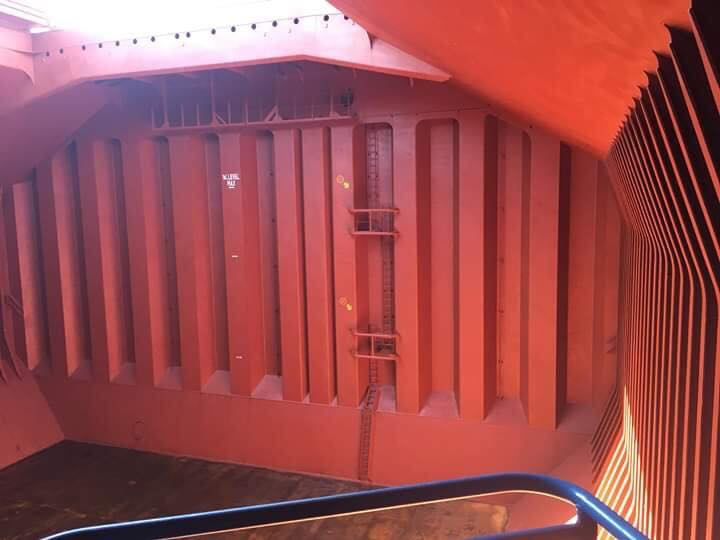

In [ ]:
x = io.imread('/content/47681173_2008763662504219_1873423245131120640_n.jpg')
x

In [ ]:
x = x.reshape((1,) + x.shape)
x.shape

(1, 540, 720, 3)

In [ ]:
# https://www.youtube.com/watch?v=ccdssX4rIh8

i = 0
for batch in datagen.flow(x, batch_size=4,
                          save_to_dir='preview',
                          save_prefix='cargo',
                          save_format='jpeg'):
  i += 1
  if i > 20:
    break

In [ ]:
# creating training data
train_generator = datagen.flow_from_directory(
    'cargo holds',
    target_size=(512, 512),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

FileNotFoundError: [Errno 2] No such file or directory: 'cargo holds'

In [ ]:
val_generator = datagen.flow_from_directory(
    'cargo holds',
    target_size=(512, 512),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 11 images belonging to 2 classes.


In [ ]:
# fit model
model.fit(train_generator, epochs=10, validation_data=val_generator)

Epoch 1/10


ValueError: Cannot take the length of shape with unknown rank.